<a href="https://colab.research.google.com/github/Yash8154/May-2025-/blob/main/Python_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Question:-1

In [6]:
# Combine 3 Sheets and get Consolidated data

In [7]:
import pandas as pd

# Path to your Excel file
file_path = '/content/drive/MyDrive/python/3. Sample Sales Data.xlsx'

# Read all sheet names
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names

# Read and combine all sheets
df_combined = pd.concat([pd.read_excel(xls, sheet_name=sheet) for sheet in sheet_names], ignore_index=True)

# Display the combined DataFrame
print(df_combined.head())


         Date     Product Region  Units_Sold  Revenue Salesperson  Channel  \
0  2022-01-01     Almonds   West          37   295.16       Meena   Online   
1  2022-01-01     Raisins   East          14   218.39         Raj   Online   
2  2022-01-01     Walnuts   West          45   642.71       Anita   Online   
3  2022-01-02  Pistachios  South           6    32.33         Raj  Offline   
4  2022-01-02     Cashews   East          41   509.45       Meena   Online   

  Customer_Type  
0        Retail  
1     Wholesale  
2        Retail  
3        Retail  
4     Wholesale  


In [10]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2738 entries, 0 to 2737
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2738 non-null   object 
 1   Product        2738 non-null   object 
 2   Region         2738 non-null   object 
 3   Units_Sold     2738 non-null   int64  
 4   Revenue        2738 non-null   float64
 5   Salesperson    2738 non-null   object 
 6   Channel        2738 non-null   object 
 7   Customer_Type  2738 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 171.3+ KB


In [12]:
# Remove rows where 'Revenue' is NaN or zero
df_cleaned = df_combined[df_combined['Revenue'].notna() & (df_combined['Revenue'] != 0)]


In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2738 entries, 0 to 2737
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2738 non-null   object 
 1   Product        2738 non-null   object 
 2   Region         2738 non-null   object 
 3   Units_Sold     2738 non-null   int64  
 4   Revenue        2738 non-null   float64
 5   Salesperson    2738 non-null   object 
 6   Channel        2738 non-null   object 
 7   Customer_Type  2738 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 171.3+ KB


In [18]:
# Convert date column to datetime
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')


In [19]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2738 entries, 0 to 2737
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2738 non-null   datetime64[ns]
 1   Product        2738 non-null   object        
 2   Region         2738 non-null   object        
 3   Units_Sold     2738 non-null   int64         
 4   Revenue        2738 non-null   float64       
 5   Salesperson    2738 non-null   object        
 6   Channel        2738 non-null   object        
 7   Customer_Type  2738 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 171.3+ KB


In [20]:
df_2023 = df_cleaned[df_cleaned['Date'].dt.year == 2023]


In [21]:
print("Number of records from 2023:", len(df_2023))


Number of records from 2023: 906


Question-2

In [22]:
#Group the data by 'Region' and calculate the total revenue per region

In [23]:
region_revenue = df_cleaned.groupby('Region')['Revenue'].sum().reset_index()

In [24]:
print(region_revenue)

  Region    Revenue
0   East  224901.65
1  North  210449.53
2  South  209615.34
3   West  222707.49


In [25]:
#Group the data by 'Product' and calculate the average units sold per product

In [27]:
avg_units_per_product = df_cleaned.groupby('Product')['Units_Sold'].mean().reset_index()

In [28]:
print(avg_units_per_product)

      Product  Units_Sold
0     Almonds   24.582090
1     Cashews   24.777580
2  Pistachios   25.386874
3     Raisins   24.858238
4     Walnuts   26.853432


In [33]:
#Sort the regions by revenue in descending order

In [32]:
region_revenue_sorted = region_revenue.sort_values(by='Revenue', ascending=False)
print(region_revenue_sorted)


  Region    Revenue
0   East  224901.65
3   West  222707.49
1  North  210449.53
2  South  209615.34


Question-3

In [34]:
#Generate a pivot table that shows total Revenue for each Product by Month.

In [35]:
# Add 'Month' column
df_cleaned['Month'] = df_cleaned['Date'].dt.month_name()

# Create pivot table of total Revenue by Product and Month
pivot_table = pd.pivot_table(
    df_cleaned,
    values='Revenue',
    index='Product',
    columns='Month',
    aggfunc='sum',
    fill_value=0
)

# Show pivot table
print(pivot_table)


Month          April    August  December  February   January      July  \
Product                                                                  
Almonds     14553.31  16042.96  11738.92  10477.61  12911.16  17365.25   
Cashews     13903.64  13871.12  17337.03  10860.47  16351.38  16935.75   
Pistachios  13379.01  17376.67  13146.45  12578.53  13702.93  13718.72   
Raisins     18674.66  13610.65  15502.89  15713.37  13184.52  12027.10   
Walnuts     11368.05  14138.77  12511.53  15416.38  17009.38  16939.67   

Month           June     March       May  November   October  September  
Product                                                                  
Almonds     11223.20  17506.21  13445.57  11662.72  13416.74   12733.69  
Cashews     14683.24  15412.13  16636.23   9684.64  12918.04   12562.86  
Pistachios  21704.29  14747.42  16106.37  15127.94  18969.11   14913.76  
Raisins     12447.34  14692.66  13740.04  12823.30  12150.93    8888.99  
Walnuts     20699.74  14453.15  14731

In [36]:
#-For each month, display the top 10 products based on total Revenue
#(Note: This is hypothetical – use dummy logic)


In [37]:
# Step 1: Extract month in 'YYYY-MM' format
df_cleaned['Month'] = df_cleaned['Date'].dt.strftime('%Y-%m')

# Step 2: Group by Month and Product
monthly_product_revenue = df_cleaned.groupby(['Month', 'Product'])['Revenue'].sum().reset_index()

# Step 3: Sort and get top 10 products for each month
top_10_each_month = (
    monthly_product_revenue
    .sort_values(['Month', 'Revenue'], ascending=[True, False])
    .groupby('Month')
    .head(10)
)

# Step 4: Display result
print(top_10_each_month)


       Month     Product  Revenue
1    2022-01     Cashews  6743.63
4    2022-01     Walnuts  5821.50
0    2022-01     Almonds  4682.22
2    2022-01  Pistachios  4461.96
3    2022-01     Raisins  2426.35
..       ...         ...      ...
178  2024-12     Raisins  7221.21
179  2024-12     Walnuts  6163.93
176  2024-12     Cashews  5731.09
177  2024-12  Pistachios  4676.72
175  2024-12     Almonds  3347.73

[180 rows x 3 columns]


Question-4

In [38]:
#Using matplotlib/seaborn and the cleaned dataset:
#Plot a line chart showing daily total revenue
#Plot a bar chart showing top 5 products by total revenue


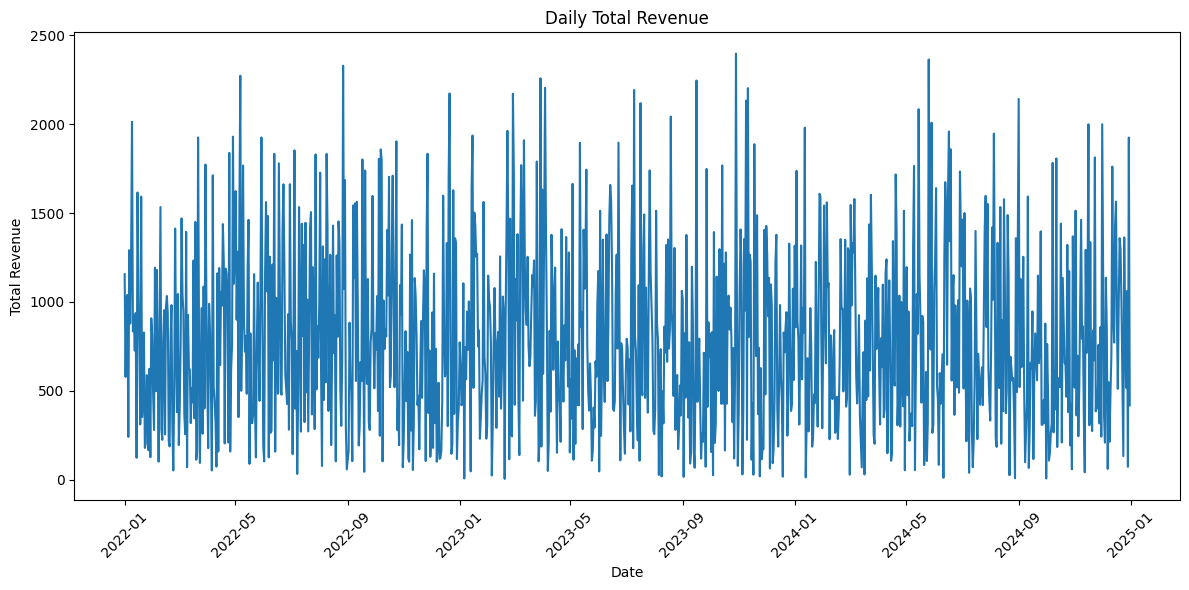

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Date and calculate total revenue
daily_revenue = df_cleaned.groupby('Date')['Revenue'].sum().reset_index()

# Sort by Date
daily_revenue = daily_revenue.sort_values(by='Date')

# Plotting the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_revenue, x='Date', y='Revenue')
plt.title('Daily Total Revenue')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-40-72353b7f2d2b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_products, x='Product', y='Revenue', palette='viridis')


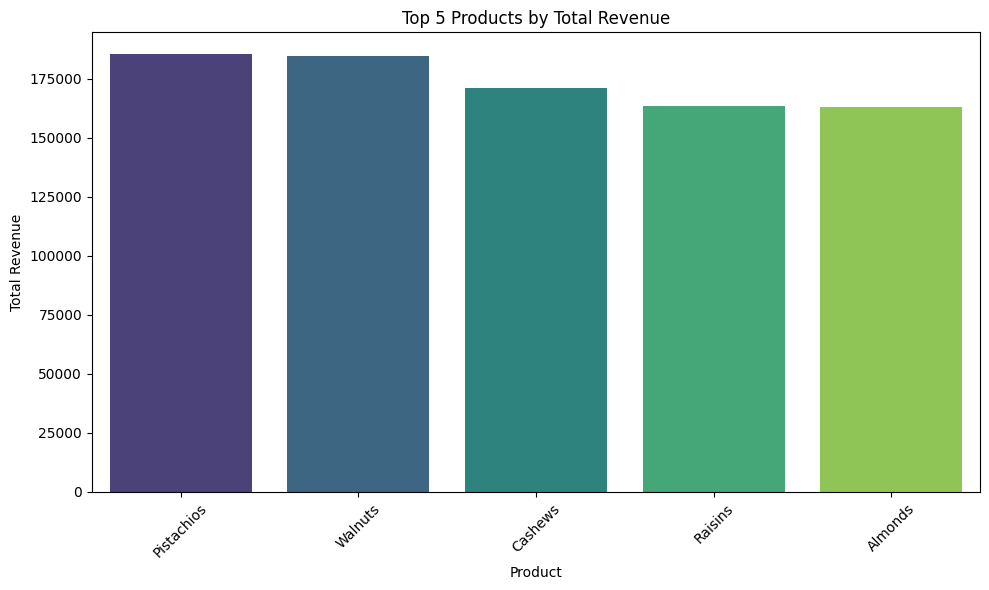

In [40]:
# Group by Product and calculate total revenue
product_revenue = df_cleaned.groupby('Product')['Revenue'].sum().reset_index()

# Sort by Revenue in descending order and get the top 5
top_5_products = product_revenue.sort_values(by='Revenue', ascending=False).head(5)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_products, x='Product', y='Revenue', palette='viridis')
plt.title('Top 5 Products by Total Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()